<a href="https://colab.research.google.com/github/fener95/GEE-bugisu-project/blob/main/Fig2_BugisuProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is based ALMOST entirely on this SOURCE: https://medium.com/@janosovm; AUTHOR: Milan Janosov


# SETUP

In [ ]:
#------openstreetmap osmnx
!pip install osmnx
import osmnx as ox
#------ streets networks related
import networkx as nx
import random
from networkx.algorithms.community import greedy_modularity_communities


#----plotting related
!pip install contextily
import contextily as ctx

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


# Figure 2 generation and download

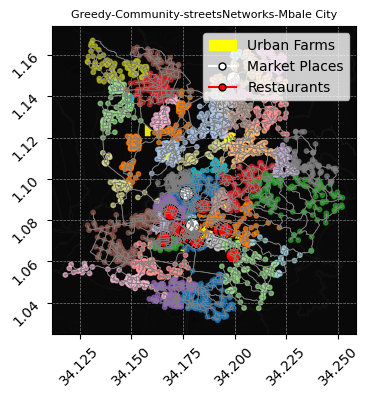

In [4]:
# Define the polygon for Mbale City
admin_district = ox.geocode_to_gdf('Mbale City')
admin_poly = admin_district.geometry.values[0]

# Load the graph from OSMnx
G = ox.graph_from_polygon(admin_poly, network_type='walk')

# Perform community detection
communities = greedy_modularity_communities(G)

# Create a dictionary mapping nodes to their community
node_community = {}
for i, community in enumerate(communities):
    for node in community:
        node_community[node] = i

# Get nodes and edges as GeoDataFrames
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

# Add community data to the nodes GeoDataFrame
nodes['community'] = nodes.index.map(node_community)

# Download additional POI types within the administrative boundary
restaurants = ox.features_from_polygon(admin_poly, tags={'amenity': 'restaurant'})
#schools = ox.features_from_polygon(admin_poly, tags={'amenity': 'school'})
#hospitals = ox.features_from_polygon(admin_poly, tags={'amenity': 'hospital'})
markets = ox.features_from_polygon(admin_poly, tags={'amenity': 'marketplace'})
urban_farms = ox.features_from_polygon(admin_poly, tags={'landuse': 'farmland'})

# Plot the network with nodes colored by community
fig, ax = plt.subplots(figsize=(4, 4))   # in place of 10 x 10 ; condiser that 1 inch is 2.54cm
nodes.plot(ax=ax,
           column='community',
           categorical=True,
           legend=False,
           markersize=10,
           alpha=0.7,
           cmap='tab20')
edges.plot(ax=ax, color='gray', linewidth=0.5)

# Plot the POIs
restaurants.plot(ax=ax, color='red', edgecolor = 'black', markersize=120, alpha=0.9, label='Restaurants')
#schools.plot(ax=ax, color='purple', markersize=60, alpha=0.9, label='Schools')
#hospitals.plot(ax=ax, color='pink', markersize=60, alpha=0.9, label='Hospitals')
#markets.plot(ax=ax, color='white', markersize=60, alpha=0.9, label='Market Places')

markets.plot(ax=ax, color='white', edgecolor='black', markersize=100, alpha=0.9, label='Market Places')
urban_farms.plot(ax=ax, color='yellow', markersize=60, alpha=0.9, label='Urban Farms')

# Add basemap using contextily
#ctx.add_basemap(ax, crs=nodes.crs.to_string(), source=ctx.providers.CartoDB.DarkMatterNoLabels)

# Add basemap using contextily without the Carto logo
ctx.add_basemap(ax, crs=nodes.crs.to_string(), source=ctx.providers.CartoDB.DarkMatterNoLabels, attribution='')
# Set the title
ax.set_title('Greedy-Community-streetsNetworks-Mbale City', fontsize=8)
ax.axis('on')   # or Off
# Add gridlines
ax.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
ax.xaxis.set_tick_params(rotation=45)
ax.yaxis.set_tick_params(rotation=45)

# legend of urban farm fields with squared patches
urban_farms_patch = mpatches.Patch(color='yellow', label='Urban Farms')
restaurants_patch = mlines.Line2D([], [], color='red', marker='o', markersize=5, markeredgecolor='black', label='Restaurants')
markets_patch = mlines.Line2D([], [], color='white', marker='o', markersize=5, markeredgecolor='black', label='Market Places')
ax.legend(handles=[urban_farms_patch, markets_patch, restaurants_patch], loc='upper right')
"""
# Change the font size of the legend and remove the frame
legend = ax.get_legend()
if legend is not None:
    plt.setp(legend.get_texts(), fontsize=6)
    legend.get_frame().set_linewidth(0)
"""
# Show the plot
plt.show()

In [ ]:
# after checking the visualization:
   #ash the plt.show and run only the savefig below

# Save the plot as a PNG file
#plt.savefig('Mbale_City_StreetCommunityNetwork.png', dpi=300, bbox_inches='tight')

